In [52]:
import numpy as np
from synthesizer.photoionisation import cloudy23
import matplotlib.pyplot as plt
from astropy.io import ascii
from synthesizer.sed import Sed
from unyt import cm, erg, Angstrom, pc, s, h, c
import cmasher as cmr


In [53]:

ionisation_parameter = 0.1 

model = 'hden' 
hdens = np.arange(1, 12, 1)

colours = cmr.take_cmap_colors('cmr.ember', len(hdens), cmap_range=(0.1, 0.9))


## Ionisation structure

Show all models

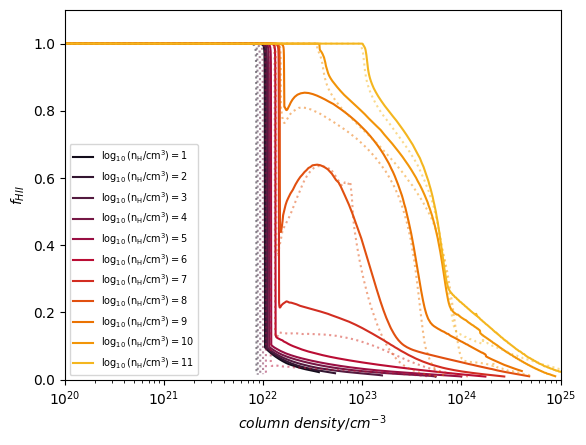

In [54]:

lws = np.linspace(4, 1, len(values))
alphas = np.linspace(0.1, 1., len(values))

zone = 'HII'

for i, hden in enumerate(hdens):

    hydrogen_density = 10**hden / cm**3

    data = ascii.read(f'{model}_no-xrays/{i+1}.ovr')
    depth = data['depth'] * cm
    column_density = depth * hydrogen_density 
    plt.plot(column_density.to('cm**-2').value, data[zone], c=colours[i], alpha=0.5, ls=':')

    # data = ascii.read(f'{model}_no-metals/{i+1}.ovr')
    # depth = data['depth'] * cm
    # column_density = depth * hydrogen_density 
    # plt.plot(column_density.to('cm**-2').value, data[zone], c=colours[i], alpha=0.5, ls='--')

    data = ascii.read(f'{model}/{i+1}.ovr')
    depth = data['depth'] * cm
    column_density = depth * hydrogen_density 
    label = rf'$\rm \log_{{10}}(n_{{H}}/cm^{{3}})={hden}$'
    plt.plot(column_density.to('cm**-2').value, data[zone], label=label, c=colours[i])

        
plt.legend(fontsize=7)
plt.xscale('log')
plt.xlabel('$column\ density/cm^{-3}$')
plt.ylabel('$f_{HII}$')
plt.xlim(1E20, 1E25)
plt.ylim(0.0, 1.1)
plt.show()


Show final model only

## H-alpha luminosity / ionising photon luminosity

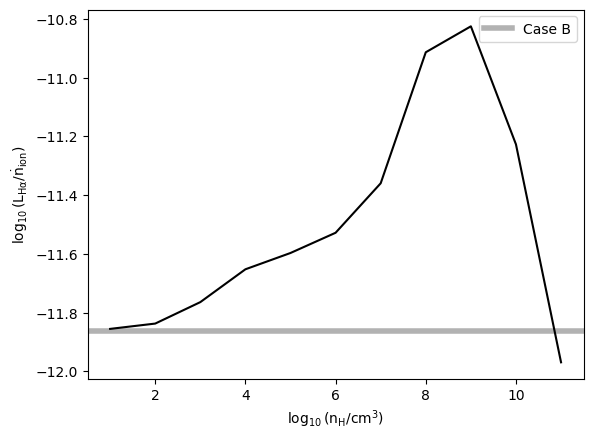

In [55]:
case_b = (1.08E-53 / 7.9E-42) # erg


fig, ax = plt.subplots()
extension = 'intrinsic_elin'
ratio = []

for i, hden in enumerate(hdens):

    # get the output spectra - here only for the first model since we only want the incident
    lam_, incident = np.loadtxt(f"{model}/{i+1}.cont", delimiter="\t", usecols=(0, 1)).T
    lam = lam_[::-1] * Angstrom
    nu = c / lam
    incident_lnu = incident[::-1] * (erg / s) / nu / 1E7
    sed = Sed(lam=lam, lnu=incident_lnu)
    bolometric_luminosity = sed.bolometric_luminosity
    ionising_photon_luminosity = sed.calculate_ionising_photon_production_rate()

    # get tuple of line_id, wavelength, and line luminosity
    linelist = cloudy23.read_linelist(f'{model}/{i+1}', extension=extension)

    # convert tuple of arrays into a dictionary
    line_luminosity = dict(zip(linelist[0], linelist[2]))
    
    # calculate the ratio
    ratio.append(line_luminosity['H 1 6562.80A']/ionising_photon_luminosity)

ax.plot(hdens, np.log10(np.array(ratio)), c='k')

ax.axhline(np.log10(case_b), c='k', lw=4, alpha=0.3, label='Case B')
ax.set_xlabel(r'$\rm \log_{10}(n_{H}/cm^{3})$')
ax.set_ylabel(r'$\rm \log_{10}(L_{H\alpha}/\dot{n}_{ion})$')
ax.legend()

plt.show()

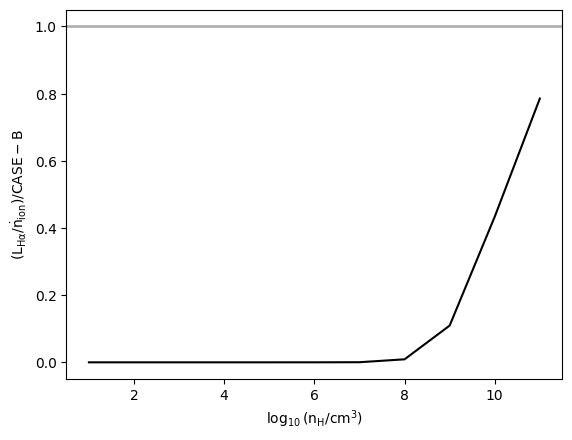

In [56]:



fig, ax = plt.subplots()

extension = 'intrinsic_elin'

ratio = []

for i, hden in enumerate(hdens):

    # get tuple of line_id, wavelength, and line luminosity
    linelist = cloudy23.read_linelist(f'{model}/{i+1}', extension=extension)

    # convert tuple of arrays into a dictionary
    line_luminosity = dict(zip(linelist[0], linelist[2]))

    ratio.append(line_luminosity['H 1 6562.80A']/ionising_photon_luminosity.to('1/s').value)

ax.plot(hdens, np.array(ratio)/case_b, c='k')

ax.axhline(1, c='k', lw=2, alpha=0.3)
ax.set_xlabel(r'$\rm \log_{10}(n_{H}/cm^{3})$')
ax.set_ylabel(r'$\rm (L_{H\alpha}/\dot{n}_{ion})/CASE-B$')


plt.show()

## Balmer Decrement

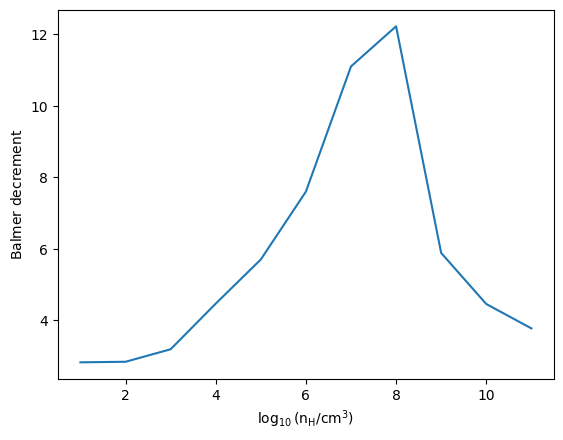

In [57]:

fig, ax = plt.subplots()

extension = 'intrinsic_elin'

ratio = []

for i, hden in enumerate(hdens):

    # get tuple of line_id, wavelength, and line luminosity
    linelist = cloudy23.read_linelist(f'{model}/{i+1}', extension=extension)

    # convert tuple of arrays into a dictionary
    line_luminosity = dict(zip(linelist[0], linelist[2]))

    # get balmer decrement
    balmer_decrement = line_luminosity['H 1 6562.80A']/line_luminosity['H 1 4861.32A']
    ratio.append(balmer_decrement)

ax.plot(hdens, ratio)

ax.set_xlabel(r'$\rm \log_{10}(n_{H}/cm^{3})$')
ax.set_ylabel(r'$\rm Balmer\ decrement$')

plt.show()


## Plot Ha/L_bol

29973065385320.562 1/s
1.394752237136018e-22 erg
1.4541388890222067e-21 erg
1.7204112871703364e-20 erg
2.2252979180656684e-19 erg
2.5286702919988777e-18 erg
2.962926843094737e-17 erg
4.366587078013684e-16 erg
1.2193947976338793e-14 erg
1.4943416505519017e-13 erg
5.92465260783672e-13 erg
1.0732302347611872e-12 erg


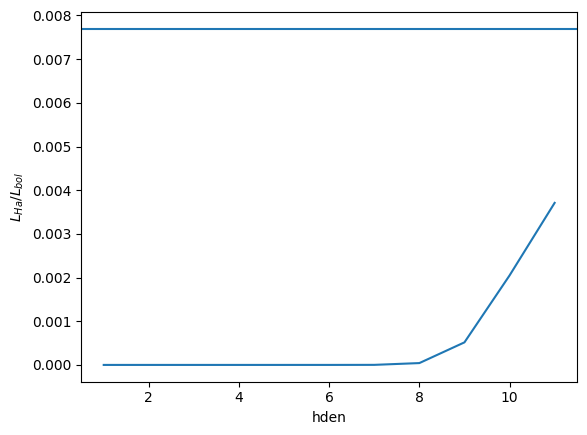

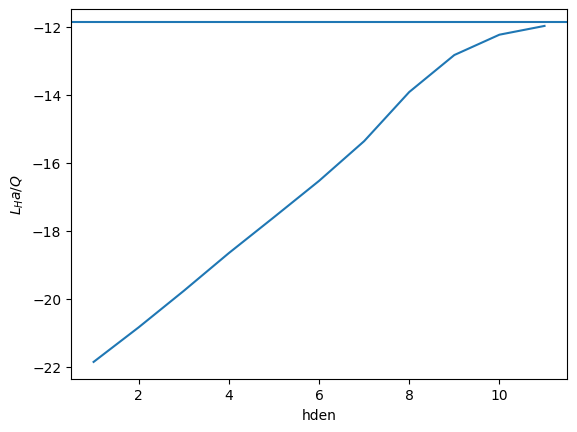

In [58]:



# get the output spectra
x, incident = np.loadtxt(f"{model}/{i+1}.cont", delimiter="\t", usecols=(0, 1)).T
lam = x[::-1] * Angstrom
nu = c / lam
incident_lnu = incident[::-1] * (erg / s) / nu / 1E7
sed = Sed(lam=lam, lnu=incident_lnu)
bolometric_luminosity = sed.bolometric_luminosity
Q = sed.calculate_ionising_photon_production_rate()
print(Q)

# Case B correction factor
correction_factor = (1.08E-53 / 7.9E-42) * erg

extension = 'intrinsic_elin'

lines = ['H 1 6562.80A', 'H 1 4861.32A']

luminosity = {line : [] for line in lines}

bolometric_ratio = []
Q_ratio = []

for i, hden in enumerate(hdens):

    # get tuple of line_id, wavelength, and line luminosity
    linelist = cloudy23.read_linelist(f'{model}/{i+1}', extension=extension)

    # convert tuple of arrays into a dictionary
    line_luminosity = dict(zip(linelist[0], linelist[2] * erg/s))

    bolometric_ratio.append(line_luminosity['H 1 6562.80A']/bolometric_luminosity)


    Q_rat = line_luminosity['H 1 6562.80A']/Q
    print(Q_rat)
    Q_ratio.append(Q_rat)


plt.axhline(1/130.)   
plt.plot(values, bolometric_ratio)   
plt.ylabel('$L_{Ha}/L_{bol}$')
plt.xlabel(model)

plt.show()

plt.plot(values, np.log10(np.array(Q_ratio)))
plt.axhline(np.log10(correction_factor.to('erg').value))   
plt.ylabel('$L_Ha/Q$')
plt.xlabel(model)
plt.show()